# Diabetes Prediction Using Machine Learning

### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [4]:
# Libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] =14
matplotlib.rcParams['figure.figsize']=(12,10)
matplotlib.rcParams['figure.facecolor']='#33779900'
%matplotlib inline

In [6]:
# Load data
data = pd.read_csv('./diabetes-data-set/diabetes.csv')

In [8]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Analysis

In [10]:
# Check the shape of the dataset (number of rows and columns)
data.shape

(768, 9)

In [11]:
# Check the info() seems like there is not missing value in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
# Check the statistics of the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


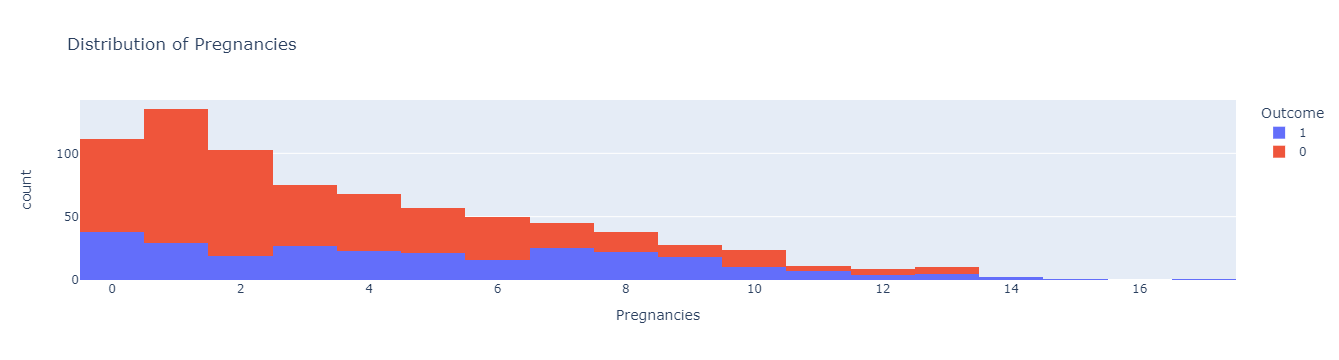

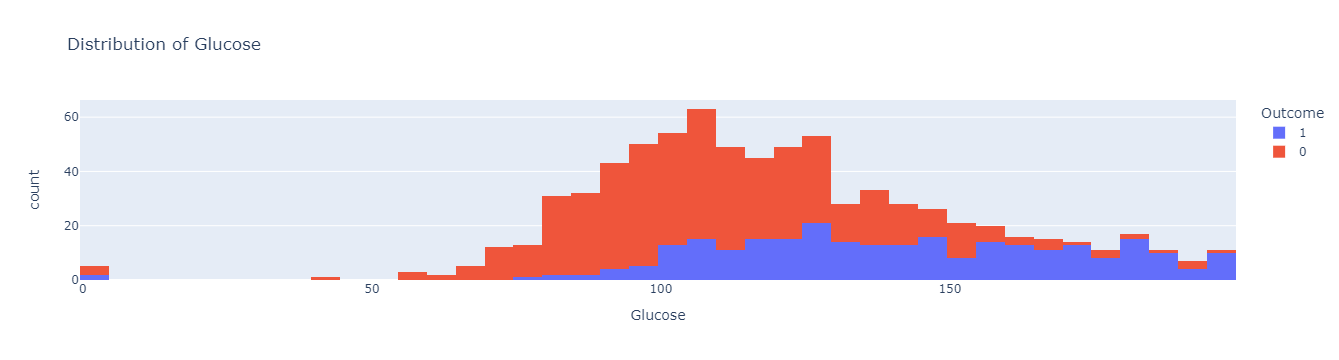

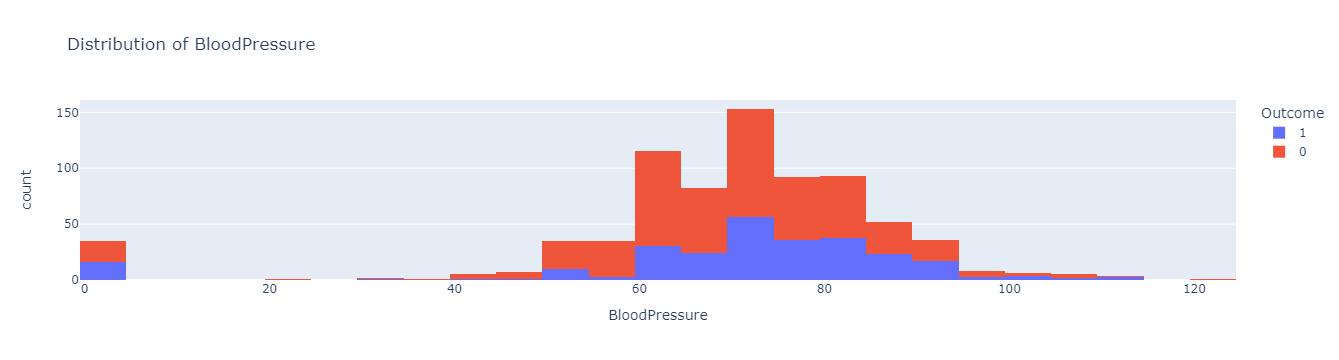

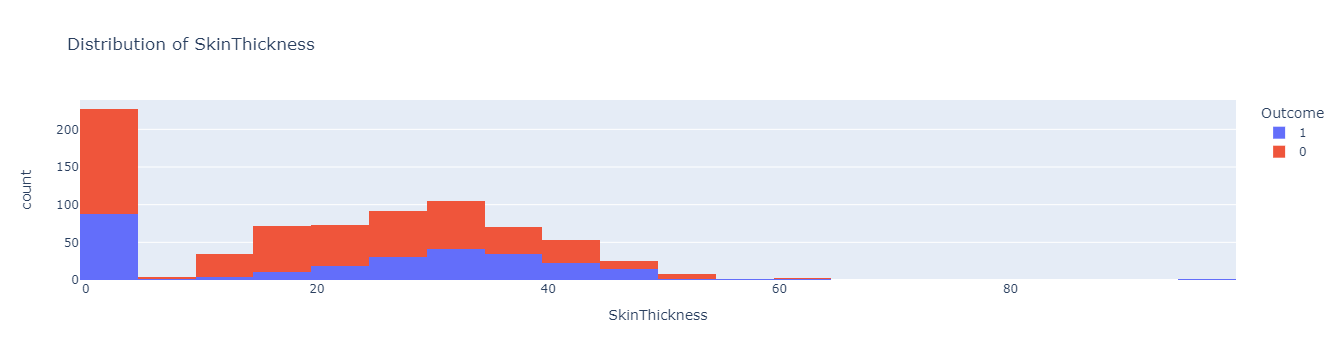

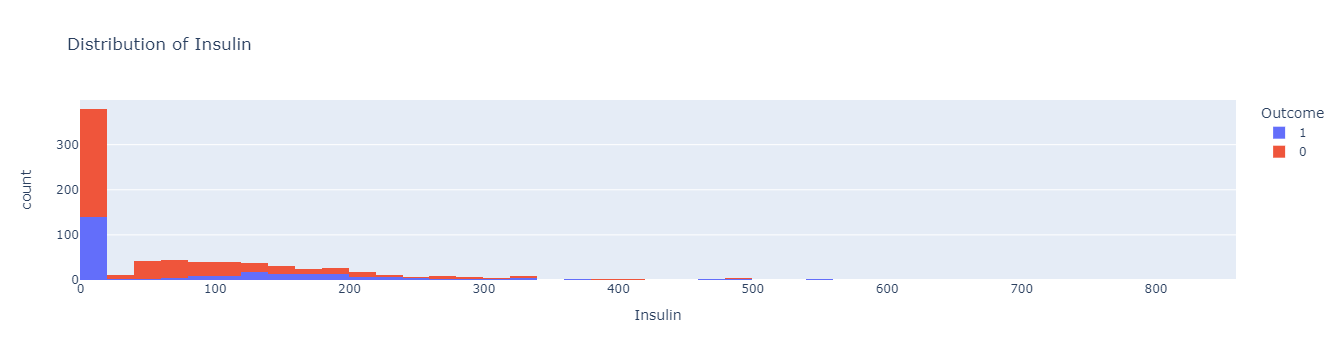

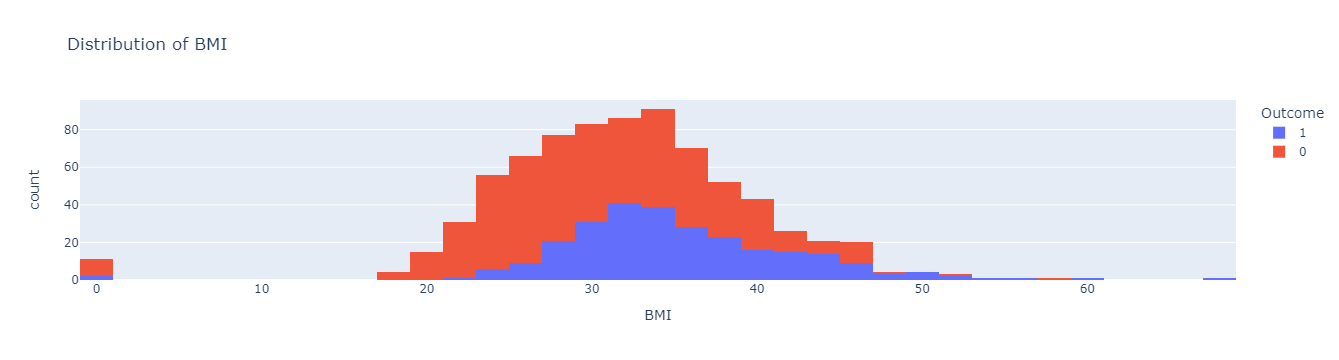

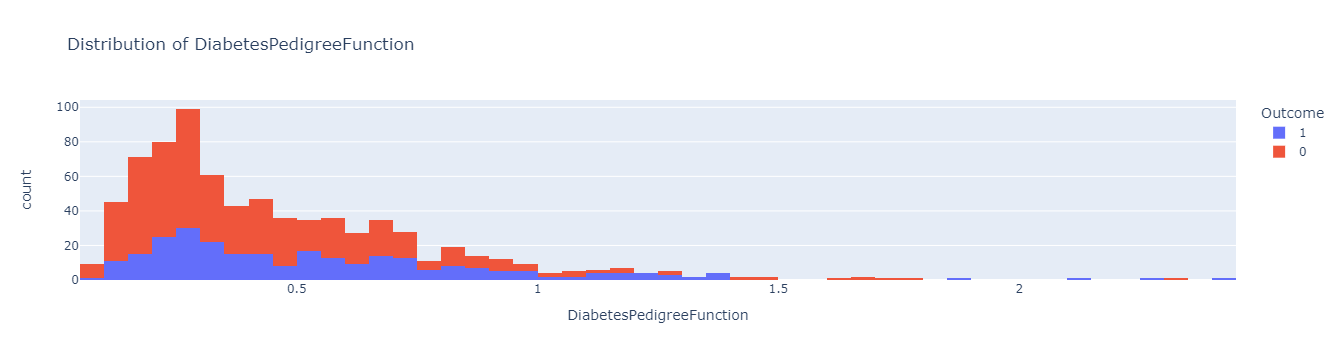

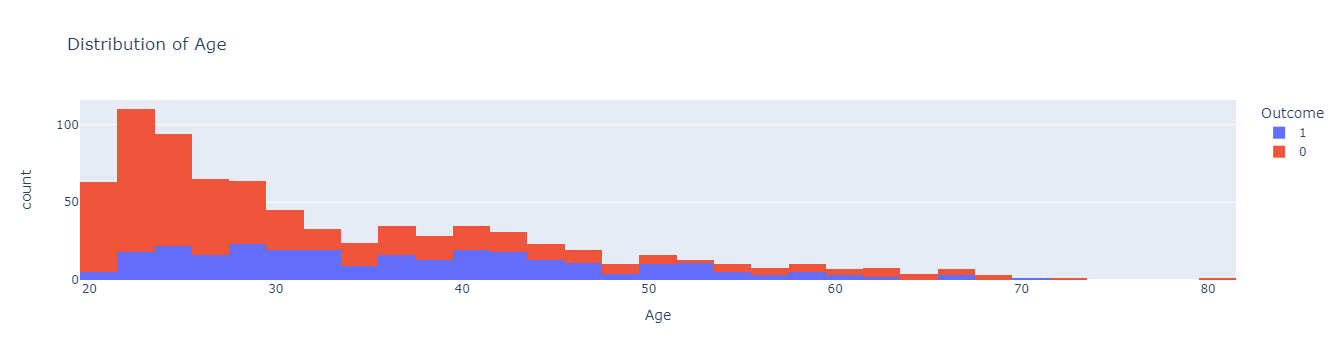

In [24]:
# Visualize the distribution of independent variables
list = [feature for feature in data.columns if feature!='Outcome']
for feature in list:
    fig=px.histogram(data,
                    x=feature,
                    color='Outcome',
                    
                    title='Distribution of {}'.format(feature))
    #fig.update_layout(bargap=0.1)
    fig.show()

''

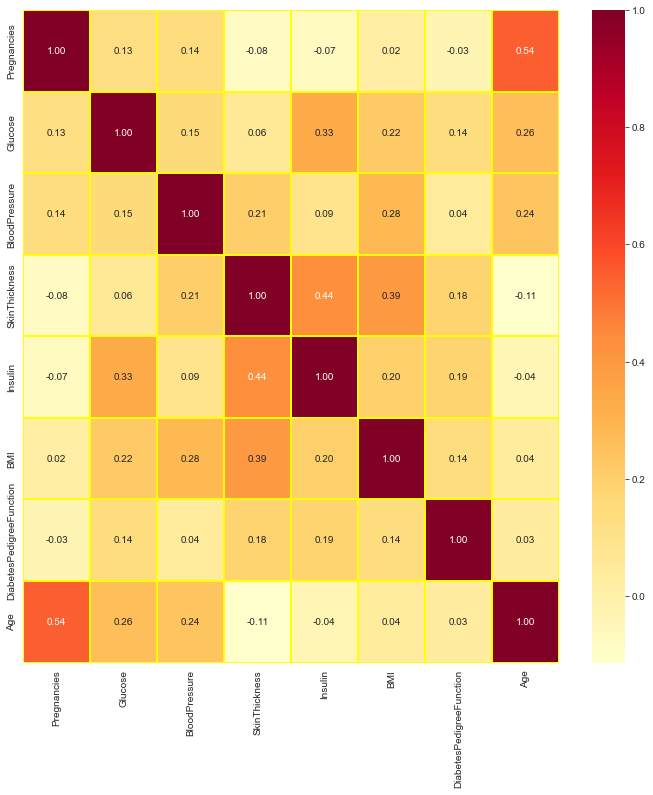

In [249]:

plt.figure(figsize=(12,12))
sns.heatmap(data[list].corr(), cmap='YlOrRd',annot=True, fmt='.2f', linecolor='yellow',linewidths=2)
;

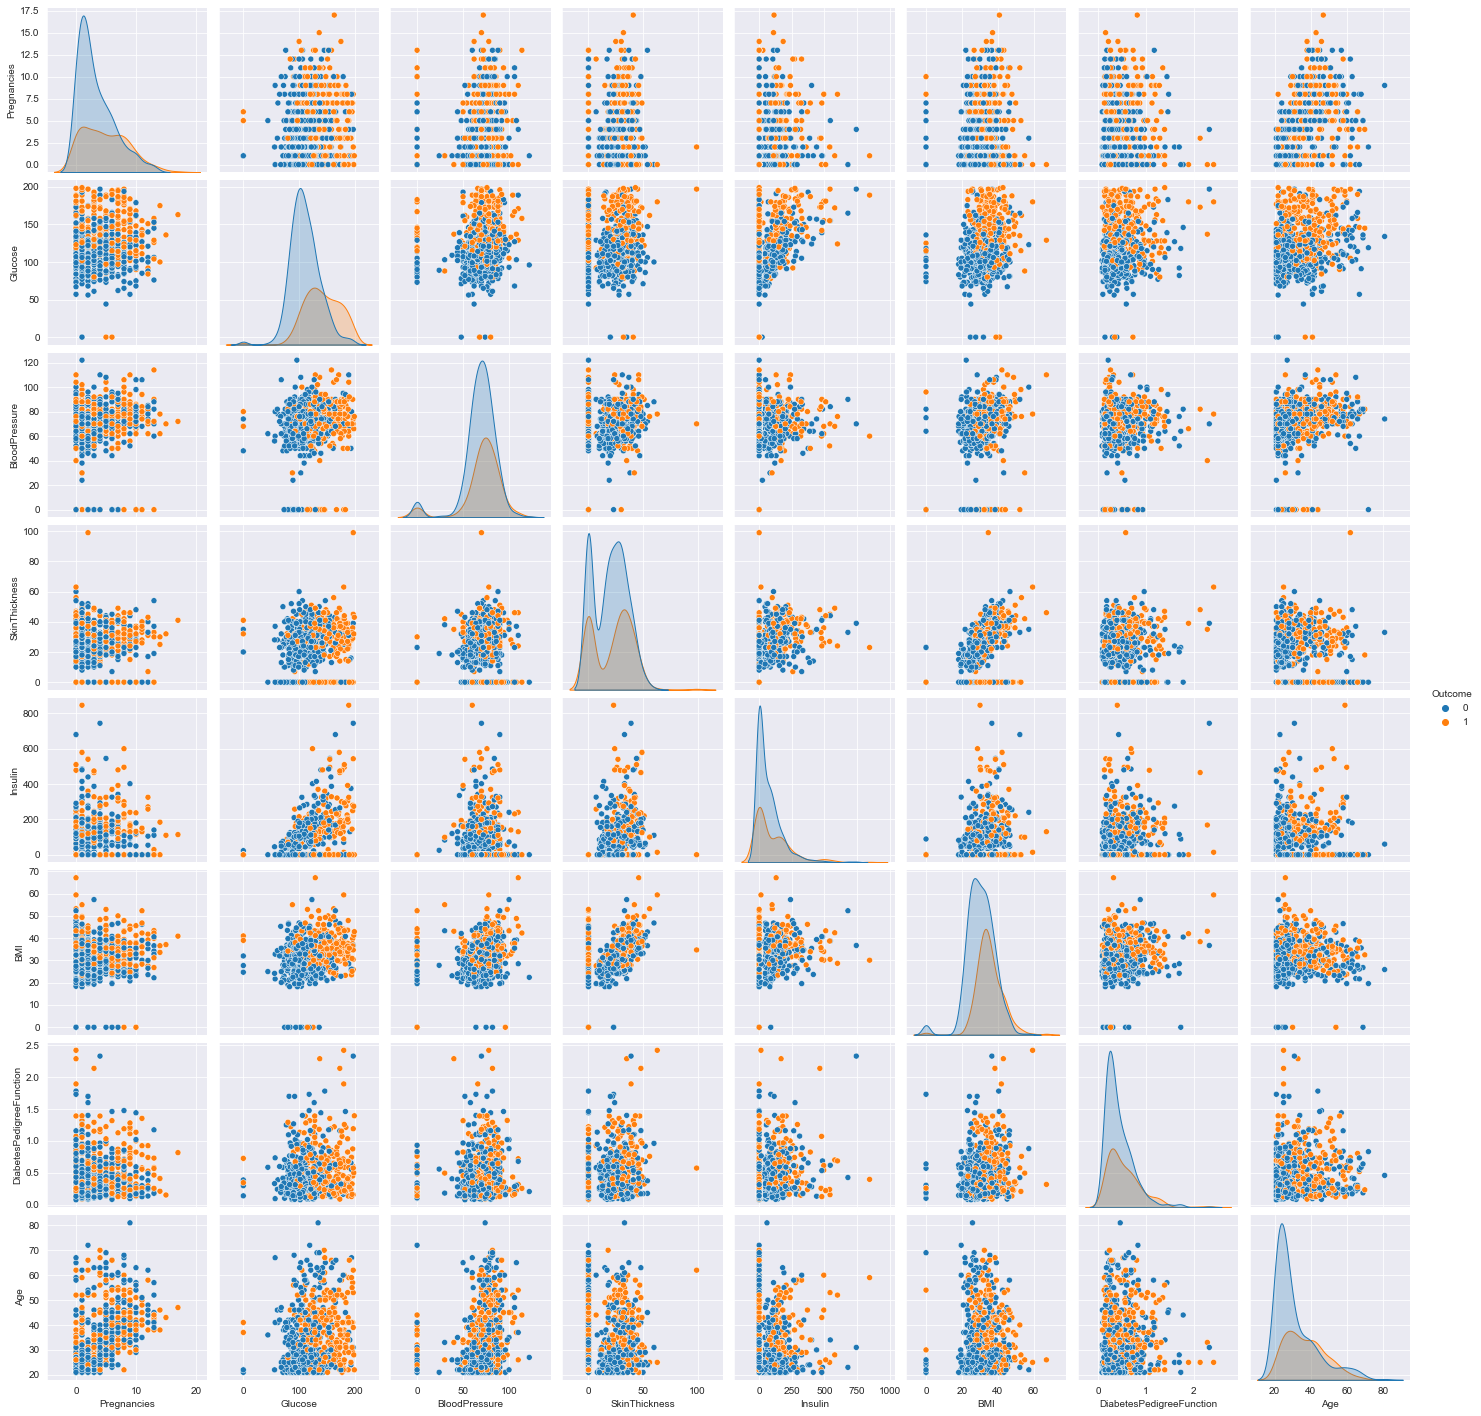

In [44]:
sns.pairplot(data,hue='Outcome');

In [32]:
# Count the number in percentage of classes in the dependent variable
## 0 represents Non Diabetic
## 1 represents Diabetic
data.Outcome.value_counts()/len(data) * 100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [34]:
# Compute the mean value of each class
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [36]:
# Separating the independent variables and the dependent variable
X =data[list]
y='Outcome'
Y= data[y]
print(X,Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


## Preprocessing

In [38]:
# Standardize the data using StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize
scaler = StandardScaler()

# Fit the data into the scaler
scaler.fit(X)

# Transform the data
scaled_data = scaler.transform(X)

In [39]:
scaled_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [40]:
# Redifine the new independent variables 
X= scaled_data

In [41]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [180]:
# Splitting the data into train and test data using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.1, stratify=Y,random_state=3)

# Print the shape

print(X_train.shape,X_test.shape)

(691, 8) (77, 8)


## Train the Model

In [196]:
# Train the model using SVM
from sklearn.svm import SVC

# Initialize the model and Fit the model
model = SVC(kernel='rbf').fit(X_train, Y_train)

In [197]:
# Generate prediction
pred_train = model.predict(X_train)
pred_train[:5]

array([1, 0, 1, 1, 0], dtype=int64)

In [198]:
Y_train[:5]

40     0
341    0
693    1
546    1
413    0
Name: Outcome, dtype: int64

## Model Evaluation 

In [199]:
# We will evaluate the model using Accuracy Score
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(Y_train, pred_train)
print("Train Accuracy Score: {}%".format(round(acc_train *100, 2)))

Train Accuracy Score: 82.34%


In [200]:
# Accuracy of the test data
acc_test = accuracy_score(Y_test, model.predict(X_test))

# Print the accuracy of the test data
print("Test Accuracy Score: {}%".format(round(acc_test *100, 2)))

Test Accuracy Score: 81.82%


# Funtion to predict 

In [261]:
# Helper function to predict 

def predict_input(raw_data):
    np_raw_data = np.array(raw_data)
    rsp_raw_data = np_raw_data.reshape(1,-1)
    
    input_df = scaler.transform(rsp_raw_data)
    
    
    pred = model.predict(input_df)[0]
    
    diab = 'Diabetic'
    non_diab = 'Not Diabetic'
    
    if pred == 1:
        print("This person is {}".format(diab))
    else:
        print('This person is {}'.format(non_diab))
    
    return 

In [262]:
# Take random data in the dataset and see if he prediction is correct
raw_data = (3,126,88,41,235,39.3,0.704,27)

In [263]:
predict_input(raw_data)

This person is Not Diabetic


# End

In [264]:
import pickle

In [265]:
filename = 'jm_model.sav'

pickle.dump(model, open(filename, 'wb')) # wb to write

In [266]:
# Load the model

new_model = pickle.load(open('jm_model.sav', 'rb')) # rb to read